In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def imshow(title = "Image" , image = None , size = 10):
    w , h = image.shape[0] , image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size , size * aspect_ratio))
    plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

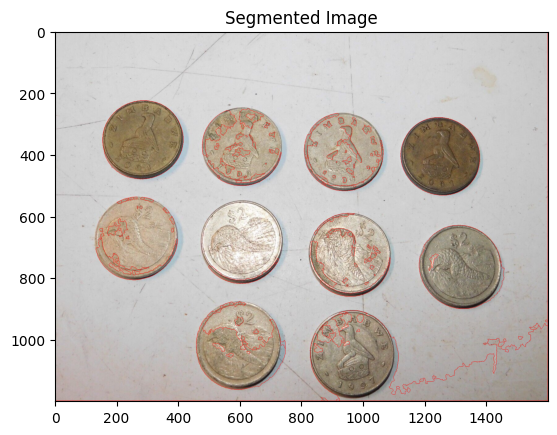

In [ ]:

image = cv2.imread('images/coins.jpg')  # خواندن تصویر
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # تبدیل به خاکستری
blurred = cv2.GaussianBlur(gray, (7, 7), 0)  # کاهش نویز با فیلتر گوسی
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # ترشلدینگ ساده
kernel = np.ones((3, 3), np.uint8)  # تعریف کرنل
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)  # حذف نویز با Opening
sure_bg = cv2.dilate(opening, kernel, iterations=3)  # مطمئن‌سازی پس‌زمینه
sure_fg = cv2.erode(opening, kernel, iterations=3)  # مطمئن‌سازی پیش‌زمینه
unknown = cv2.subtract(sure_bg, sure_fg)  # ناحیه‌های ناشناخته

ret, markers = cv2.connectedComponents(sure_fg)  # برچسب‌گذاری ناحیه‌های مطمئن پیش‌زمینه
markers = markers + 1  # افزایش برچسب‌ها به دلیل اینکه پس‌زمینه باید برچسب ۱ داشته باشد
markers[unknown == 255] = 0  # ناحیه‌های ناشناخته را با ۰ برچسب‌گذاری کنید
markers = cv2.watershed(image, markers)  # اعمال الگوریتم Watershed

image[markers == -1] = [0, 0, 255]  # رنگ‌آمیزی مرز سکه‌ها با رنگ قرمز
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # نمایش تصویر با مرز سکه‌ها
plt.title("Segmented Image")
plt.show()